<h1 style='color: green; font-size: 36px; font-weight: bold;'>Topico em Banco de Dados</h1>

# <font color='red' style='font-size: 30px;'>Conhecendo o Dataset</font>
<hr style='border: 2px solid red;'>

## Importando bibliotecas

http://dadosabertos.mec.gov.br/prouni/item/31-bolsas-e-perfil-2016

In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from imblearn.under_sampling import RandomUnderSampler
from sklearn import preprocessing
from sklearn.svm import SVC # "Support vector classifier"
from sklearn.model_selection import GridSearchCV, KFold, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.neighbors import KNeighborsClassifier

import time
import datetime
import os
import sys

<img width='700px' src='prouni.jpg'>

In [66]:
df = pd.read_csv("pda-prouni-2016.csv", sep=';', encoding='latin-1')

# <font color='red' style='font-size: 30px;'>Análises Preliminares</font>
<hr style='border: 2px solid red;'>

In [67]:
df.head()

,ANO_CONCESSAO_BOLSA,CODIGO_EMEC_IES_BOLSA,NOME_IES_BOLSA,TIPO_BOLSA,MODALIDADE_ENSINO_BOLSA,NOME_CURSO_BOLSA,NOME_TURNO_CURSO_BOLSA,CPF_BENEFICIARIO_BOLSA,SEXO_BENEFICIARIO_BOLSA,RACA_BENEFICIARIO_BOLSA,DT_NASCIMENTO_BENEFICIARIO,BENEFICIARIO_DEFICIENTE_FISICO,REGIAO_BENEFICIARIO_BOLSA,SIGLA_UF_BENEFICIARIO_BOLSA,MUNICIPIO_BENEFICIARIO_BOLSA
0,2016,20,UNIVERSIDADE DE PASSO FUNDO,BOLSA PARCIAL 50%,PRESENCIAL,Administração,Noturno,***847010**,Feminino,Branca,06-12-1995,NÃO,SUL,RS,SOLEDADE
1,2016,20,UNIVERSIDADE DE PASSO FUNDO,BOLSA INTEGRAL,PRESENCIAL,Administração,Noturno,***377850**,Feminino,Branca,08-08-1990,NÃO,SUL,RS,SOLEDADE
2,2016,20,UNIVERSIDADE DE PASSO FUNDO,BOLSA PARCIAL 50%,PRESENCIAL,Administração,Noturno,***266150**,Masculino,Branca,08-03-1999,NÃO,SUL,RS,SOLEDADE
3,2016,20,UNIVERSIDADE DE PASSO FUNDO,BOLSA PARCIAL 50%,PRESENCIAL,Administração,Noturno,***408700**,Feminino,Branca,24-04-1997,NÃO,SUL,RS,SOLEDADE
4,2016,423,UNIVERSIDADE REGIONAL INTEGRADA DO ALTO URUGUA...,BOLSA PARCIAL 50%,PRESENCIAL,Ciências Contábeis,Noturno,***560300**,Masculino,Branca,07-05-1994,NÃO,SUL,RS,ERECHIM


In [68]:
df.shape

(239262, 15)

In [69]:
df.columns

Index(['ANO_CONCESSAO_BOLSA', 'CODIGO_EMEC_IES_BOLSA', 'NOME_IES_BOLSA',
       'TIPO_BOLSA', 'MODALIDADE_ENSINO_BOLSA', 'NOME_CURSO_BOLSA',
       'NOME_TURNO_CURSO_BOLSA', 'CPF_BENEFICIARIO_BOLSA',
       'SEXO_BENEFICIARIO_BOLSA', 'RACA_BENEFICIARIO_BOLSA',
       'DT_NASCIMENTO_BENEFICIARIO', 'BENEFICIARIO_DEFICIENTE_FISICO',
       'REGIAO_BENEFICIARIO_BOLSA', 'SIGLA_UF_BENEFICIARIO_BOLSA',
       'MUNICIPIO_BENEFICIARIO_BOLSA'],
      dtype='object')

In [70]:
df.dtypes

ANO_CONCESSAO_BOLSA                int64
CODIGO_EMEC_IES_BOLSA              int64
NOME_IES_BOLSA                    object
TIPO_BOLSA                        object
MODALIDADE_ENSINO_BOLSA           object
NOME_CURSO_BOLSA                  object
NOME_TURNO_CURSO_BOLSA            object
CPF_BENEFICIARIO_BOLSA            object
SEXO_BENEFICIARIO_BOLSA           object
RACA_BENEFICIARIO_BOLSA           object
DT_NASCIMENTO_BENEFICIARIO        object
BENEFICIARIO_DEFICIENTE_FISICO    object
REGIAO_BENEFICIARIO_BOLSA         object
SIGLA_UF_BENEFICIARIO_BOLSA       object
MUNICIPIO_BENEFICIARIO_BOLSA      object
dtype: object

In [71]:
print('Datas de nascimento: ', df['DT_NASCIMENTO_BENEFICIARIO'].unique().shape, '\n')

Datas de nascimento:  (12861,) 



# <font color='red' style='font-size: 30px;'>Tratando os dados</font>
<hr style='border: 2px solid red;'>

## Binning Encoder

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>É a tentativa de tranformar dados não categoricos em categoricos, baseando-se em uma faixa de valores, diminuindo a quantidade de tpos de amostras</p>

In [72]:
years = list()
df['DT_NASCIMENTO_BENEFICIARIO'].apply(lambda x: years.append(x.split('-')[-1]))
df['DT_NASCIMENTO_BENEFICIARIO'] = np.array(years)

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'><b>Visualizando valores únicos nas colunas</b> </p>

In [73]:
print('Datas de nascimento: ', df['DT_NASCIMENTO_BENEFICIARIO'].unique().shape, '\n')
print('Anos no dataset: ', df['ANO_CONCESSAO_BOLSA'].unique().shape, '\n')
print('Total de valores unicos: ', df['CPF_BENEFICIARIO_BOLSA'].unique().shape, '\n')
print('Total de instituição de educação superior: ', df['NOME_IES_BOLSA'].unique().shape, '\n')
print('Tamenho do dataset: ', df.shape, '\n')

Datas de nascimento:  (60,) 

Anos no dataset:  (1,) 

Total de valores unicos:  (202141,) 

Total de instituição de educação superior:  (1102,) 

Tamenho do dataset:  (239262, 15) 



<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'><b>Removendo colunas desnecessárias</b> </p>

In [74]:
df.drop(['CPF_BENEFICIARIO_BOLSA', 'ANO_CONCESSAO_BOLSA'], axis=1, inplace=True)

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'><b>Removendo linhas que possuam valores nulos</b> </p>

In [75]:
df.dropna(inplace=True)
df.shape

(239218, 13)

In [76]:
df.head()

,CODIGO_EMEC_IES_BOLSA,NOME_IES_BOLSA,TIPO_BOLSA,MODALIDADE_ENSINO_BOLSA,NOME_CURSO_BOLSA,NOME_TURNO_CURSO_BOLSA,SEXO_BENEFICIARIO_BOLSA,RACA_BENEFICIARIO_BOLSA,DT_NASCIMENTO_BENEFICIARIO,BENEFICIARIO_DEFICIENTE_FISICO,REGIAO_BENEFICIARIO_BOLSA,SIGLA_UF_BENEFICIARIO_BOLSA,MUNICIPIO_BENEFICIARIO_BOLSA
0,20,UNIVERSIDADE DE PASSO FUNDO,BOLSA PARCIAL 50%,PRESENCIAL,Administração,Noturno,Feminino,Branca,1995,NÃO,SUL,RS,SOLEDADE
1,20,UNIVERSIDADE DE PASSO FUNDO,BOLSA INTEGRAL,PRESENCIAL,Administração,Noturno,Feminino,Branca,1990,NÃO,SUL,RS,SOLEDADE
2,20,UNIVERSIDADE DE PASSO FUNDO,BOLSA PARCIAL 50%,PRESENCIAL,Administração,Noturno,Masculino,Branca,1999,NÃO,SUL,RS,SOLEDADE
3,20,UNIVERSIDADE DE PASSO FUNDO,BOLSA PARCIAL 50%,PRESENCIAL,Administração,Noturno,Feminino,Branca,1997,NÃO,SUL,RS,SOLEDADE
4,423,UNIVERSIDADE REGIONAL INTEGRADA DO ALTO URUGUA...,BOLSA PARCIAL 50%,PRESENCIAL,Ciências Contábeis,Noturno,Masculino,Branca,1994,NÃO,SUL,RS,ERECHIM


## Label Encoder

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>É a tentativa de tranformar valores categoricos nominais em valores categoricos numéricos. Utilizaremos a biblioteca sklearn para esta tarefa</p>

In [77]:
df_for_train = df.drop(['NOME_IES_BOLSA', 'CODIGO_EMEC_IES_BOLSA', 'DT_NASCIMENTO_BENEFICIARIO'], axis=1)

In [78]:
le = preprocessing.LabelEncoder()

for i in df_for_train:
    le.fit(df_for_train[i])
    df_for_train[i] = le.transform(df_for_train[i])

## Matriz de correlação

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>O <b>coeficiente de correlação</b> é uma medida de associação linear entre duas variáveis e situa-se entre <b>-1</b> e <b>+1</b> sendo que <b>-1</b> indica associação negativa perfeita e <b>+1</b> indica associação positiva perfeita.</p>

In [79]:
df_for_train.corr().round(4)

,TIPO_BOLSA,MODALIDADE_ENSINO_BOLSA,NOME_CURSO_BOLSA,NOME_TURNO_CURSO_BOLSA,SEXO_BENEFICIARIO_BOLSA,RACA_BENEFICIARIO_BOLSA,BENEFICIARIO_DEFICIENTE_FISICO,REGIAO_BENEFICIARIO_BOLSA,SIGLA_UF_BENEFICIARIO_BOLSA,MUNICIPIO_BENEFICIARIO_BOLSA
TIPO_BOLSA,1.0000,0.1759,-0.0582,0.1775,-0.0133,0.0233,-0.0055,-0.1481,-0.1625,-0.0381
MODALIDADE_ENSINO_BOLSA,0.1759,1.0000,-0.1537,0.8993,0.0337,-0.0226,-0.0258,-0.0416,-0.0030,0.0294
NOME_CURSO_BOLSA,-0.0582,-0.1537,1.0000,-0.1555,-0.0999,0.0134,0.0049,0.0160,0.0139,0.0028
NOME_TURNO_CURSO_BOLSA,0.1775,0.8993,-0.1555,1.0000,0.0569,-0.0152,-0.0233,-0.0336,0.0023,0.0266
SEXO_BENEFICIARIO_BOLSA,-0.0133,0.0337,-0.0999,0.0569,1.0000,0.0314,0.0263,-0.0172,-0.0204,-0.0010
RACA_BENEFICIARIO_BOLSA,0.0233,-0.0226,0.0134,-0.0152,0.0314,1.0000,-0.0067,-0.3082,-0.2845,-0.0109
BENEFICIARIO_DEFICIENTE_FISICO,-0.0055,-0.0258,0.0049,-0.0233,0.0263,-0.0067,1.0000,-0.0046,-0.0035,-0.0035
REGIAO_BENEFICIARIO_BOLSA,-0.1481,-0.0416,0.0160,-0.0336,-0.0172,-0.3082,-0.0046,1.0000,0.6141,0.1103
SIGLA_UF_BENEFICIARIO_BOLSA,-0.1625,-0.0030,0.0139,0.0023,-0.0204,-0.2845,-0.0035,0.6141,1.0000,0.1828
MUNICIPIO_BENEFICIARIO_BOLSA,-0.0381,0.0294,0.0028,0.0266,-0.0010,-0.0109,-0.0035,0.1103,0.1828,1.0000


## Separando dados

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>Aqui separaremos nossa base de dados em dados com as features e com os labels, já com o label encoder</p>

In [80]:
X = df_for_train.drop(['TIPO_BOLSA'], axis=1)
y = df_for_train['TIPO_BOLSA']

In [81]:
le.fit(y)
y = le.transform(y)

In [82]:
X['CODIGO_EMEC_IES_BOLSA'], X['DT_NASCIMENTO_BENEFICIARIO'] = df['CODIGO_EMEC_IES_BOLSA'], df['DT_NASCIMENTO_BENEFICIARIO']
X.head()

,MODALIDADE_ENSINO_BOLSA,NOME_CURSO_BOLSA,NOME_TURNO_CURSO_BOLSA,SEXO_BENEFICIARIO_BOLSA,RACA_BENEFICIARIO_BOLSA,BENEFICIARIO_DEFICIENTE_FISICO,REGIAO_BENEFICIARIO_BOLSA,SIGLA_UF_BENEFICIARIO_BOLSA,MUNICIPIO_BENEFICIARIO_BOLSA,CODIGO_EMEC_IES_BOLSA,DT_NASCIMENTO_BENEFICIARIO
0,1,0,3,0,1,0,4,22,4132,20,1995
1,1,0,3,0,1,0,4,22,4132,20,1990
2,1,0,3,1,1,0,4,22,4132,20,1999
3,1,0,3,0,1,0,4,22,4132,20,1997
4,1,40,3,1,1,0,4,22,1455,423,1994


## Dados desbalanceados

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>Aqui percebemos que nossa base de dados apresenta quantidades desbalanceadas de labels, o que pode resultar em problemas no treinamento do algoritmo, como o overfitting</p>
<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>Para ajustar nossos dados, podemos optar pelos metodos Resampling:</p>

 * Undersampling: Remover amostras da classe majoritária 
 * Oversamplig: Adicionar mais exemplos da classe minoritária

<img width='700px' src='resampling.png'>

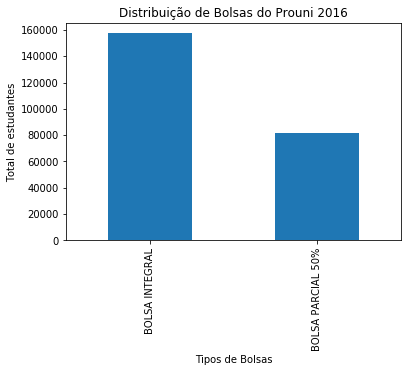

In [83]:
df['TIPO_BOLSA'].value_counts().plot(kind="bar")
plt.title("Distribuição de Bolsas do Prouni 2016")
plt.xlabel("Tipos de Bolsas")
plt.ylabel("Total de estudantes")
plt.show()

In [84]:
rus = RandomUnderSampler(return_indices=True)
X_rus, y_rus, id_rus = rus.fit_sample(X, y)

print('Removed indexes:', id_rus)

Removed indexes: [185415 155902 219565 ... 239188 239189 239190]


(array([81851.,     0., 81851.]),
 array([0.        , 0.33333333, 0.66666667, 1.        ]),
 <a list of 3 Patch objects>)

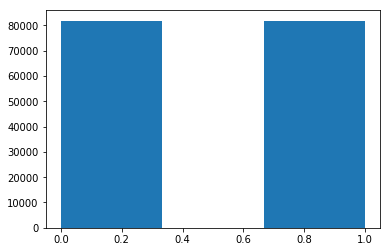

In [85]:
plt.hist(y_rus, bins=3) 

# <font color='red' style='font-size: 30px;'>Split Datas</font>
<hr style='border: 2px solid red;'>

## Dividindo dados em treino e teste

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>É importante dividir nossos dados em um subconjunto de treinamento e outro subconjunto para teste, que utilizaremos para validar a eficiência da aprendizagem do modelo em questão</p>

<img width='700px' src='dataset.png'>

In [20]:
X_train,X_test,y_train,y_test = train_test_split(X_rus,y_rus, test_size=0.3)

# <font color='red' style='font-size: 30px;'>Treinamento</font>
<hr style='border: 2px solid red;'>

## Search Hiperparameters

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>Hiperparametos são configurações externas ao modelo cujo alor não pode ser estimado a partir dos dados (quando um algoritmo de ML é ajustado a um problema específico)</p>

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>Afim de encontrar os melhores hiperparametros para o modelos, podemos utilizar os seguintes metodos: </p>

* Babysitting: Abordagem manual, e mais amplamente utilizada por pesquisadores;
* GridSearch: Abordagem de força bruta, combinando varios valores, tentando chegar na melhor combinação;
* RandomSearch: Abordagem de amostras aleatórias avaliando o conjunto em uma distribuição de probabilidades especificas;
* Bayesian Optimization: Abordagem que tenta prever as métricas que interessam na configuração;

<img width='700px' src='search.png'>

# <font color='blue' style='font-size: 20px;'>K - Nearest Neighbors</font>
<hr style='border: 2px solid blue;'>

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>Um dos algoritmos mais utilizados em Machine Learning e também um dos mais simplistas, podendo ser utilizado tanto para classificação quanto para regressão</p>

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>O KNN é um algoritmo não paramétrico, onde a estrutura do modelo será determinada pelo dataset utilizado</p>


<img width='700px' src='knn.png'>

In [41]:
parameters = {
    'n_neighbors': np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10]),
    'metric': ['minkowski', 'euclidean']
}
gs_knn = GridSearchCV(KNeighborsClassifier(), parameters)

In [42]:
start = time.time()
gs_knn = gs_knn.fit(X_train, y_train)
print(time.time() - start)

c:\users\allan\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


369.6813642978668


In [43]:
print(gs_knn.best_params_)

{'metric': 'minkowski', 'n_neighbors': 3}


In [21]:
error = []

for i in range(1, 10):  
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Mean Error')

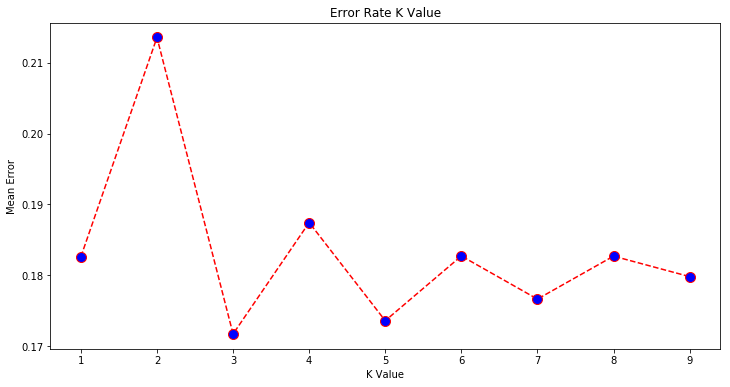

In [22]:
plt.figure(figsize=(12, 6))  
plt.plot(range(1, 10), error, color='red', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')  
plt.xlabel('K Value')  
plt.ylabel('Mean Error')  

In [102]:
classifier = KNeighborsClassifier(n_neighbors=3, metric='minkowski')
classifier.fit(X_train, y_train) 

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

In [103]:
y_pred = classifier.predict(X_test) 

In [104]:
accuracy_score(y_test, y_pred)

0.8283073038626784

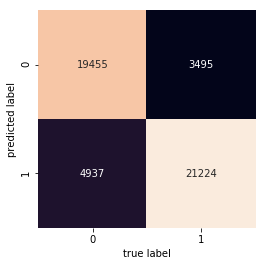

In [88]:
mat = confusion_matrix(y_test, y_pred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');

# <font color='blue' style='font-size: 20px;'>Naive Bayes</font>
<hr style='border: 2px solid blue;'>

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>Naive Bayes é um exemplo de classificação generativa onde simplesmente descrevemos a distribuição de cada classe subjacente e usamos esses modelos geradores para determinar probabilisticamente rótulos para novos pontos </p>

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>Considera os atributos do espaço probabilístico individualmente, sendo um independente do outro</p>

<img width='700px' src='nb.png'>

In [89]:
parameters = {
    'alpha': np.linspace(0.5, 1.5, 6),
    'fit_prior': [True, False]
}
gs_nb = GridSearchCV(MultinomialNB(), parameters)

In [90]:
start = time.time()
gs_nb = gs_nb.fit(X_train, y_train)
print(time.time() - start)

c:\users\allan\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


9.388930797576904


In [93]:
print(gs_nb.best_params_)

{'alpha': 0.5, 'fit_prior': True}


In [95]:
classifier = MultinomialNB(alpha=0.5, fit_prior=True)
classifier.fit(X_train, y_train) 

MultinomialNB(alpha=0.5, class_prior=None, fit_prior=True)

In [96]:
y_pred = classifier.predict(X_test) 

In [101]:
accuracy_score(y_test, y_pred)

0.6038972938852802

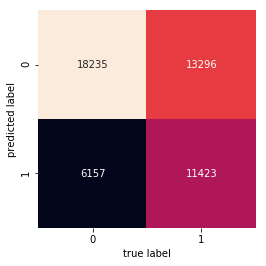

In [97]:
mat = confusion_matrix(y_test, y_pred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');

# <font color='blue' style='font-size: 20px;'>Support Vector Machine</font>
<hr style='border: 2px solid blue;'>

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>Support Vector Machine (SVM) é uma classe particularmente poderosa e flexível de algoritmos supervisionados para classificação e regressão.</p>

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>Classificação discriminativa: em vez de modelar cada classe, simplesmente encontramos uma linha ou curva (em duas dimensões) que divide as classes umas das outras.</p>

<img width='700px' src='svm.png'>

In [108]:
parameters = {
    'kernel': ['linear', 'rbf'],
    'C': np.linspace(0.5, 1.0, 5)
}
gs_svc = GridSearchCV(SVC(), parameters)

In [2]:
start = time.time()
gs_svc = gs_svc.fit(X_train, y_train)
print(time.time() - start)

In [4]:
print(gs_svc.best_params_)

{'kernel': 'rbf', 'C': 0.5}


In [6]:
classifier = SVC(kernel='rbf', C=0.5)
classifier.fit(X_train, y_train) 

In [7]:
y_pred = classifier.predict(X_test) 

In [9]:
import numpy as np
s = np.array([1, 2, 3])

In [ ]:
accuracy_score(y_test, y_pred)

In [ ]:
mat = confusion_matrix(y_test, y_pred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');